In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn import preprocessing, linear_model

## Load the data

In [6]:
data = pd.read_csv('OnlineNewsPopularity.csv')
display(data.head())

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [7]:
data.shape

(39644, 61)

In [8]:
popularity_raw = data[data.keys()[-1]]
popularity_raw.describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name:  shares, dtype: float64

In [9]:
features_data = data.drop(['url', data.keys()[1],data.keys()[-1]], axis=1)

## Exploratory data analysis

In [10]:
columns_day = features_data.columns.values[29:36]
unpop=data[data[' shares']<1400]
pop=data[data[' shares']>=1400]
unpop_day = unpop[columns_day].sum().values
pop_day = pop[columns_day].sum().values

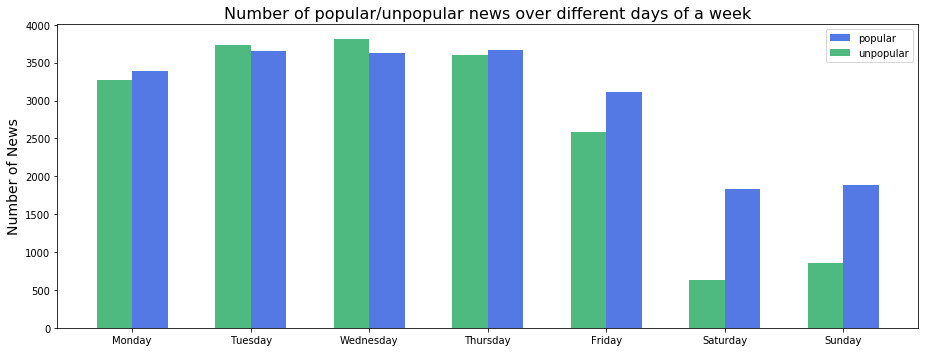

In [11]:
fig = plt.figure(figsize = (13,5))
plt.title("Number of popular/unpopular news over different days of a week", fontsize = 16)
plt.bar(np.arange(len(columns_day)), pop_day, width = 0.3, align="center", alpha=0.9, color = 'royalblue', \
        label = "popular")
plt.bar(np.arange(len(columns_day)) - 0.3, unpop_day, width = 0.3, align = "center", alpha=0.9, color = 'mediumseagreen', \
        label = "unpopular")
plt.xticks(np.arange(len(columns_day))-0.15, ('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'))
plt.ylabel("Number of News", fontsize = 14)
#plt.xlabel("Days of week", fontsize = 14)
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.savefig("days.pdf")
plt.show()

In [12]:
col_category = features_data.columns.values[11:17]
unpop_chan = unpop[col_category].sum().values
pop_chan = pop[col_category].sum().values

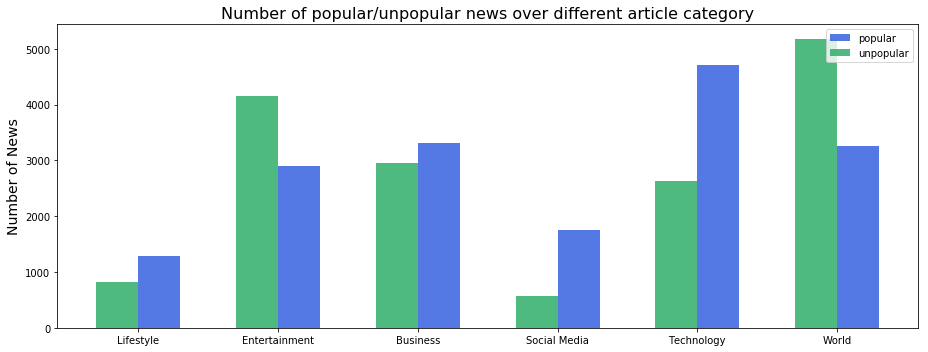

In [13]:
fig = plt.figure(figsize = (13,5))
plt.title("Number of popular/unpopular news over different article category", fontsize = 16)
plt.bar(np.arange(len(col_category)), pop_chan, width = 0.3, align="center", alpha=0.9, color = 'royalblue', \
        label = "popular")
plt.bar(np.arange(len(col_category)) - 0.3, unpop_chan, width = 0.3, align = "center", alpha=0.9, color = 'mediumseagreen', \
        label = "unpopular")
plt.xticks(np.arange(len(col_category))-0.15, ('Lifestyle','Entertainment','Business','Social Media','Technology','World'))
plt.ylabel("Number of News", fontsize = 14)
#plt.xlabel("Days of week", fontsize = 14)
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.savefig("channel.pdf")
plt.show()


In [14]:
corr = features_data.corr()


In [15]:
corr = features_data.corr()

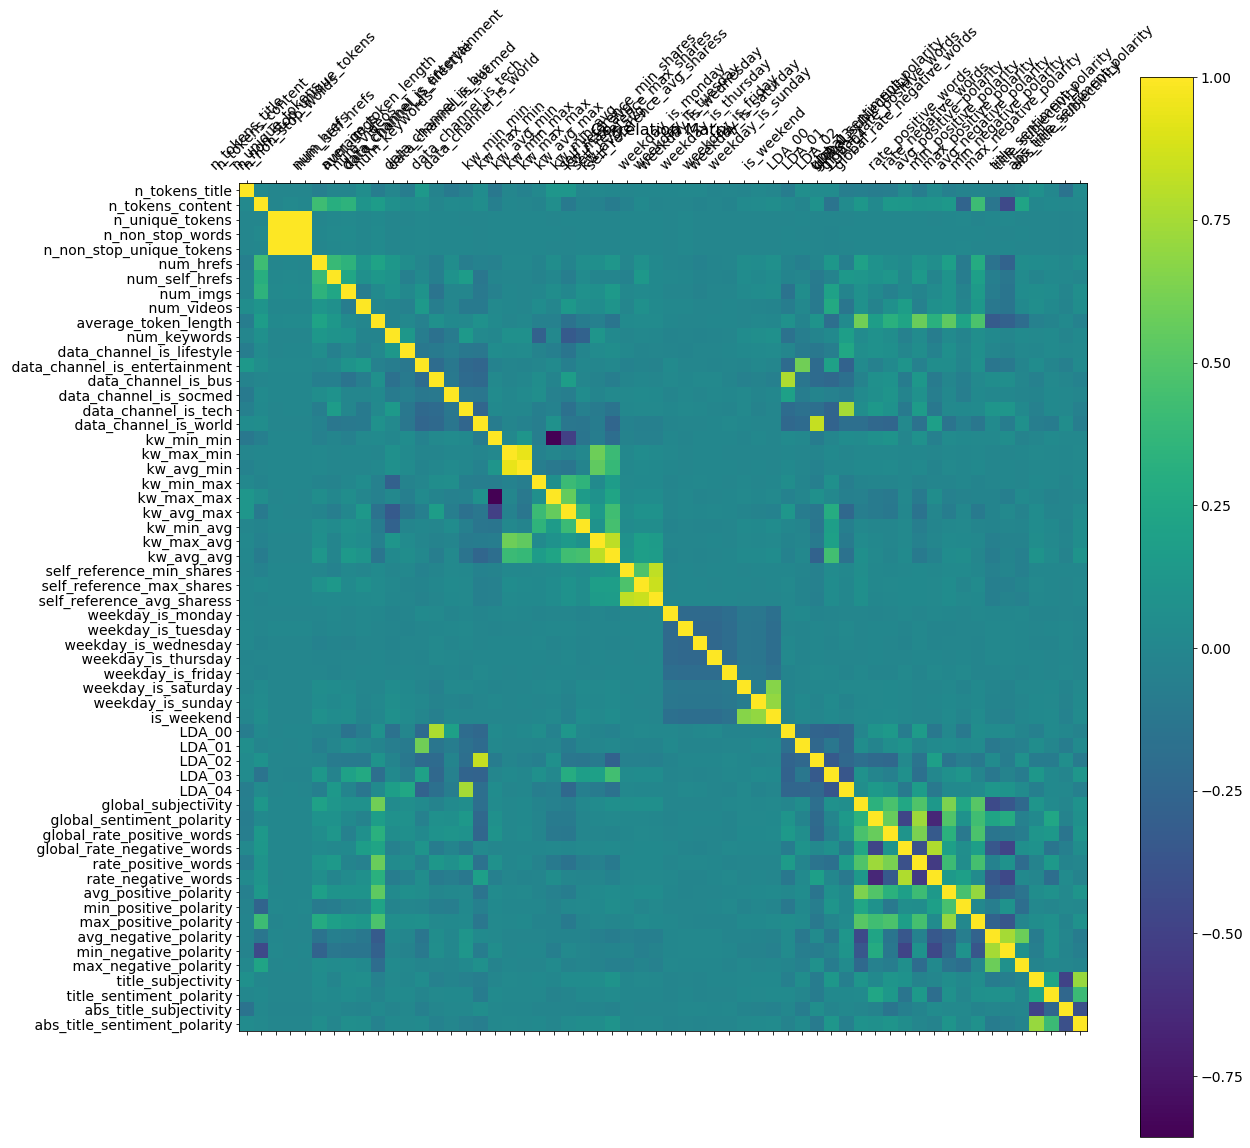

In [16]:
f = plt.figure(figsize=(19, 19))
plt.matshow(features_data.corr(), fignum=f.number)
plt.xticks(range(features_data.shape[1]), features_data.columns, fontsize=14, rotation=45)
plt.yticks(range(features_data.shape[1]), features_data, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [76]:
for i in corr.keys():
    cor_target = abs(corr[i])
    relevant_features = cor_target[cor_target>0.8]
    print(relevant_features)

 n_tokens_title    1.0
Name:  n_tokens_title, dtype: float64
 n_tokens_content    1.0
Name:  n_tokens_content, dtype: float64
 n_unique_tokens             1.000000
 n_non_stop_words            0.999572
 n_non_stop_unique_tokens    0.999852
Name:  n_unique_tokens, dtype: float64
 n_unique_tokens             0.999572
 n_non_stop_words            1.000000
 n_non_stop_unique_tokens    0.999532
Name:  n_non_stop_words, dtype: float64
 n_unique_tokens             0.999852
 n_non_stop_words            0.999532
 n_non_stop_unique_tokens    1.000000
Name:  n_non_stop_unique_tokens, dtype: float64
 num_hrefs    1.0
Name:  num_hrefs, dtype: float64
 num_self_hrefs    1.0
Name:  num_self_hrefs, dtype: float64
 num_imgs    1.0
Name:  num_imgs, dtype: float64
 num_videos    1.0
Name:  num_videos, dtype: float64
 average_token_length    1.0
Name:  average_token_length, dtype: float64
 num_keywords    1.0
Name:  num_keywords, dtype: float64
 data_channel_is_lifestyle    1.0
Name:  data_channel_is_life

n_unique_tokens             1.000000
 n_non_stop_words            0.999572
 n_non_stop_unique_tokens    0.999852
 
 data_channel_is_world    1.000000
 LDA_02                   0.836618
  kw_min_min    1.000000
 kw_max_max    0.857226
 
 kw_max_min    0.940529
 kw_avg_min    1.000000
 kw_min_min
 self_reference_min_shares     0.818907
 self_reference_max_shares     0.853480
 self_reference_avg_sharess    1.000000

In [17]:
data = pd.read_csv('olnews.csv') 
data.head()

,Unnamed: 0,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,1,731,12,219,0.663594,1.0,0.815385,4,2,1,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,2,731,9,255,0.604743,1.0,0.791946,3,1,1,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,3,731,9,211,0.575130,1.0,0.663866,3,1,1,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,4,731,9,531,0.503788,1.0,0.665635,9,0,1,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,5,731,13,1072,0.415646,1.0,0.540890,19,19,20,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [19]:
data.shape

(36879, 61)

In [22]:
data['pop'] = pd.Series(np.where(data.shares.values > 1300, 1, 0),
          data.index)
data.drop(['Unnamed: 0'],axis=1)

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,pop
0,731,12,219,0.663594,1.0,0.815385,4,2,1,0,...,0.700000,-0.350000,-0.600000,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,0
1,731,9,255,0.604743,1.0,0.791946,3,1,1,0,...,0.700000,-0.118750,-0.125000,-0.100000,0.000000,0.000000,0.500000,0.000000,711,0
2,731,9,211,0.575130,1.0,0.663866,3,1,1,0,...,1.000000,-0.466667,-0.800000,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,1
3,731,9,531,0.503788,1.0,0.665635,9,0,1,0,...,0.800000,-0.369697,-0.600000,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,0
4,731,13,1072,0.415646,1.0,0.540890,19,19,20,0,...,1.000000,-0.220192,-0.500000,-0.050000,0.454545,0.136364,0.045455,0.136364,505,0
5,731,10,370,0.559889,1.0,0.698198,2,2,0,0,...,0.600000,-0.195000,-0.400000,-0.100000,0.642857,0.214286,0.142857,0.214286,855,0
6,731,8,960,0.418163,1.0,0.549834,21,20,20,0,...,1.000000,-0.224479,-0.500000,-0.050000,0.000000,0.000000,0.500000,0.000000,556,0
7,731,12,989,0.433574,1.0,0.572108,20,20,20,0,...,1.000000,-0.242778,-0.500000,-0.050000,1.000000,0.500000,0.500000,0.500000,891,0
8,731,11,97,0.670103,1.0,0.836735,2,0,0,0,...,0.800000,-0.125000,-0.125000,-0.125000,0.125000,0.000000,0.375000,0.000000,3600,1
9,731,10,231,0.636364,1.0,0.797101,4,1,1,1,...,0.500000,-0.238095,-0.500000,-0.100000,0.000000,0.000000,0.500000,0.000000,710,0


In [23]:
X_data = data.iloc[:,1:60]

In [24]:
y = data['pop']

In [25]:
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X_data,y, test_size=test_size, random_state=seed)

In [10]:
X_train.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
30982,105,13,560,0.596226,1.0,0.740000,30,1,1,0,...,0.223261,0.033333,0.55,-0.315972,-1.0,-0.100000,0.00,0.00,0.50,0.00
23849,229,11,1146,0.392540,1.0,0.555723,15,4,5,1,...,0.435547,0.100000,1.00,-0.277056,-0.4,-0.050000,0.25,-0.15,0.25,0.15
6792,596,9,983,0.480829,1.0,0.588064,43,10,33,1,...,0.209316,0.033333,0.90,-0.197222,-0.5,-0.050000,0.40,-0.40,0.10,0.40
34069,57,13,555,0.499096,1.0,0.643275,2,1,6,1,...,0.290342,0.033333,0.60,-0.220000,-0.5,-0.050000,0.20,0.20,0.30,0.20
451,723,10,678,0.517398,1.0,0.737430,15,0,1,0,...,0.462601,0.100000,1.00,-0.237831,-0.4,-0.071429,0.00,0.00,0.50,0.00


## Scale data

In [26]:
col_ex = ['data_channel_is_lifestyle',
 'data_channel_is_entertainment',
 'data_channel_is_bus',
 'data_channel_is_socmed',
 'data_channel_is_tech',
 'data_channel_is_world',
 'weekday_is_monday',
 'weekday_is_tuesday',
 'weekday_is_wednesday',
 'weekday_is_thursday',
 'weekday_is_friday',
 'weekday_is_saturday',
 'weekday_is_sunday',
 'is_weekend']

In [27]:
cols_to_norm = [col for col in X_train.columns if col not in col_ex]

In [28]:
scale_mean = X_train[cols_to_norm].mean()
scale_std = X_train[cols_to_norm].std()

In [29]:
X_train[cols_to_norm]=(X_train[cols_to_norm]-scale_mean)/scale_std

/Users/zhijuncai/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [30]:
X_test[cols_to_norm]=(X_test[cols_to_norm]-scale_mean)/scale_std

In [31]:
X_train.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
30982,-1.163552,1.229976,0.029292,0.480936,0.169491,0.433116,1.765401,-0.590441,-0.415815,-0.303736,...,-1.262520,-0.876310,-0.838019,-0.464043,-1.665660,0.077751,-0.868100,-0.270157,0.839031,-0.687706
23849,-0.587805,0.281007,1.280908,-1.031019,0.169491,-0.788832,0.396459,0.176842,0.081767,-0.055966,...,0.803818,0.061913,0.993495,-0.155217,0.407579,0.611277,-0.091098,-0.841470,-0.481311,-0.018327
6792,1.116218,-0.667962,0.932762,-0.375653,0.169491,-0.574376,2.951819,1.711409,3.564848,-0.055966,...,-1.398262,-0.876310,0.586492,0.478322,0.062039,0.611277,0.375103,-1.793658,-1.273517,1.097304
34069,-1.386421,1.229976,0.018612,-0.240060,0.169491,-0.208272,-0.789959,-0.590441,0.206163,-0.055966,...,-0.609571,-0.876310,-0.634517,0.297564,0.062039,0.611277,-0.246498,0.491593,-0.217243,0.204799
451,1.705893,-0.193477,0.281323,-0.104204,0.169491,0.416075,0.396459,-0.846202,-0.415815,-0.303736,...,1.067157,0.061913,0.993495,0.156065,0.407579,0.382623,-0.868100,-0.270157,0.839031,-0.687706


In [32]:
X_test.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
18232,-0.063133,1.704461,0.319769,-0.268035,0.169491,-0.378674,0.305196,0.176842,-0.540211,2.421733,...,0.219877,-0.876310,0.993495,-0.046316,0.062039,-0.189013,1.514707,1.126385,-0.393289,0.948553
17370,0.025086,-0.667962,0.142492,-0.014290,0.169491,-0.029457,0.761510,-0.334680,-0.415815,-0.055966,...,0.405948,0.061913,0.179489,0.419539,-0.629040,0.611277,0.530504,0.301156,-1.537586,-0.018327
31540,-1.205340,0.281007,-0.252643,0.347742,0.169491,-0.128598,0.213933,-0.334680,0.703746,-0.303736,...,1.451024,0.061913,0.993495,0.742846,0.925888,0.611277,1.100306,1.602479,-1.097472,1.506368
17520,0.011156,-0.667962,-0.303903,0.594525,0.169491,0.601757,-0.242381,-0.846202,-0.415815,-0.303736,...,-0.044149,0.061913,0.179489,0.799979,0.407579,0.433435,-0.246498,-0.651033,-0.217243,-0.241454
27943,-0.917467,0.281007,0.484231,-0.090802,0.169491,-0.213119,0.305196,0.176842,0.828142,0.439574,...,1.196879,0.061913,0.993495,-0.040687,-0.283501,0.382623,2.239909,3.538595,0.839031,3.774818


## xgb

In [41]:
model1 = XGBClassifier()
model2 = XGBClassifier(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5)

train_model1 = model1.fit(X_train, y_train)
train_model2 = model2.fit(X_train, y_train)

In [42]:
pred1 = train_model1.predict(X_test)
pred2 = train_model2.predict(X_test)

print(classification_report(y_test, pred1))
print(classification_report(y_test, pred2))


              precision    recall  f1-score   support

           0       0.67      0.67      0.67      6079
           1       0.67      0.67      0.67      6092

    accuracy                           0.67     12171
   macro avg       0.67      0.67      0.67     12171
weighted avg       0.67      0.67      0.67     12171

              precision    recall  f1-score   support

           0       0.66      0.67      0.66      6079
           1       0.66      0.65      0.66      6092

    accuracy                           0.66     12171
   macro avg       0.66      0.66      0.66     12171
weighted avg       0.66      0.66      0.66     12171



In [43]:
report = classification_report(y_test, pred1,output_dict =True)

In [44]:
xgb_eva = pd.DataFrame(report).transpose()
xgb_eva.to_csv(r'xgb_report.csv', index = False, header=True)

In [45]:
from sklearn.metrics import mean_squared_error, auc
print("Accuracy for model 1: %.2f" % (accuracy_score(y_test, pred1) * 100))
print("Accuracy for model 2: %.2f" % (accuracy_score(y_test, pred2) * 100))
print("MSE : %.4f" % mean_squared_error(y_test,pred1))

Accuracy for model 1: 66.72
Accuracy for model 2: 66.04
MSE : 0.3328


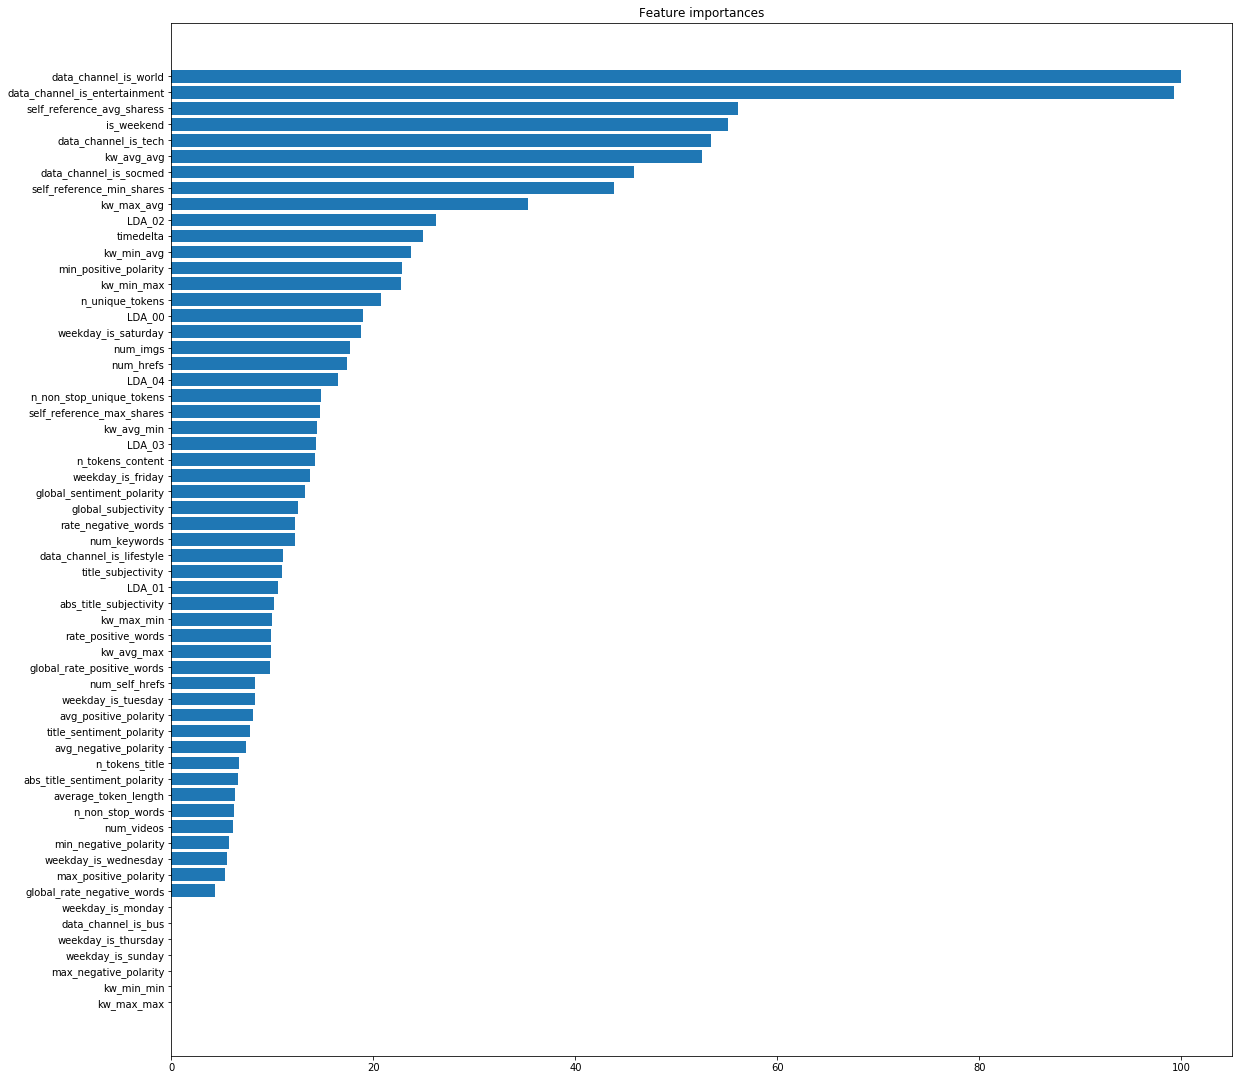

In [46]:
feature_importance = model1.feature_importances_

feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize = (19,19))
plt.title("Feature importances")
plt.barh(pos, feature_importance[sorted_idx], align = 'center')
plt.yticks(pos,X_train.keys()[sorted_idx])
plt.savefig('XGBimportance.jpeg')
plt.show()



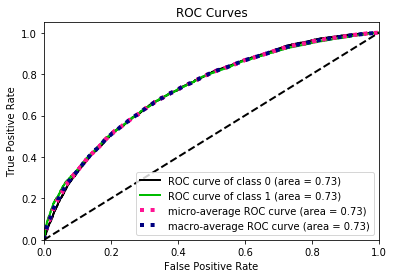

In [47]:
import scikitplot as skplt
from sklearn import metrics
probs = model1.predict_proba(X_test)
fpr, tpr, threshold = metrics.roc_curve(y_test,pred1)
roc_auc = metrics.auc(fpr,tpr)
skplt.metrics.plot_roc(y_test, probs)
plt.savefig('ROC_XG.jpeg')
plt.show()


In [48]:
sorted_idx

array([22, 18, 54, 36, 33, 14, 30, 46, 51, 32, 53,  9,  4, 10, 58,  1, 52,
       56, 49, 31,  7, 45, 23, 47, 19, 57, 39, 55, 12, 11, 48, 43, 44, 34,
        2, 41, 20, 28,  5, 42,  6,  8, 35, 38,  3, 21, 50, 24,  0, 40, 25,
       27, 15, 26, 16, 37, 29, 13, 17])

In [49]:
feature_importance[sorted_idx]

array([  0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   4.3050413,   5.2823   ,   5.4987245,
         5.6849794,   6.0552673,   6.2435613,   6.2923965,   6.640225 ,
         6.658635 ,   7.405718 ,   7.754533 ,   8.036912 ,   8.243855 ,
         8.255005 ,   9.756892 ,   9.848333 ,   9.878385 ,   9.994949 ,
        10.195421 ,  10.567842 ,  10.949828 ,  11.0028925,  12.243153 ,
        12.269001 ,  12.556987 ,  13.227461 ,  13.684368 ,  14.243682 ,
        14.353392 ,  14.425807 ,  14.758176 ,  14.857859 ,  16.449053 ,
        17.360144 ,  17.68372  ,  18.814787 ,  18.927813 ,  20.713305 ,
        22.69041  ,  22.787073 ,  23.769524 ,  24.903927 ,  26.206398 ,
        35.30889  ,  43.85743  ,  45.807182 ,  52.514427 ,  53.44177  ,
        55.094685 ,  56.157867 ,  99.27622  , 100.       ], dtype=float32)

## Logistic Regression

In [33]:
clf2 = linear_model.LogisticRegression()
clf2.fit(X_train, y_train)
predicted2 = clf2.predict(X_test)
accuracy_score(predicted2, y_test)

0.643825486812916

In [34]:
print(classification_report(y_test, predicted2))

              precision    recall  f1-score   support

           0       0.64      0.66      0.65      6079
           1       0.65      0.63      0.64      6092

    accuracy                           0.64     12171
   macro avg       0.64      0.64      0.64     12171
weighted avg       0.64      0.64      0.64     12171



In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

## Random Forest

In [36]:
rf=RandomForestClassifier()
model_rf=rf.fit(X_train,y_train)

In [37]:
pred_rf = model_rf.predict(X_test)
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.66      0.67      0.66      6079
           1       0.66      0.65      0.66      6092

    accuracy                           0.66     12171
   macro avg       0.66      0.66      0.66     12171
weighted avg       0.66      0.66      0.66     12171



In [38]:
accuracy_score(y_test, pred_rf)

0.661819078136554

In [50]:
mean_squared_error(y_test, pred_rf)

0.3381809218634459

In [51]:
fpr, tpr, threshold = metrics.roc_curve(y_test,pred_rf)
roc_auc_rf = metrics.auc(fpr,tpr)
roc_auc_rf

0.6618265906211679

In [52]:
mms=MinMaxScaler()

In [53]:
mms.fit(X_train)

MinMaxScaler()

In [54]:
X_train_mms=mms.transform(X_train)

In [55]:
X_test_mms=mms.transform(X_test)

In [56]:
model1 = XGBClassifier()
model2 = XGBClassifier(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5)

train_model1 = model1.fit(X_train_mms, y_train)
train_model2 = model2.fit(X_train_mms, y_train)

In [57]:
pred1 = train_model1.predict(X_test_mms)
pred2 = train_model2.predict(X_test_mms)

print(classification_report(y_test, pred1))
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.66      0.66      0.66      6079
           1       0.66      0.66      0.66      6092

    accuracy                           0.66     12171
   macro avg       0.66      0.66      0.66     12171
weighted avg       0.66      0.66      0.66     12171

              precision    recall  f1-score   support

           0       0.66      0.66      0.66      6079
           1       0.66      0.66      0.66      6092

    accuracy                           0.66     12171
   macro avg       0.66      0.66      0.66     12171
weighted avg       0.66      0.66      0.66     12171



## grid search

In [121]:
from sklearn.model_selection import GridSearchCV

In [122]:
estimator=XGBClassifier()

In [128]:
parameters={
    'max_depth':range (2,10,2),
    'n_estimators':range(60,200,40),
    'learning_rate':[0.1,0.01,0.05],
    'gamma':[0,0.1,0.2]
}

In [129]:
grid_search=GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs=-1,
    cv=3,
    verbose=True)

In [130]:
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   55.3s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed: 17.9min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10, 2),
    

In [132]:
predict_gs=grid_search.best_estimator_.predict(X_test)

In [134]:
print(classification_report(y_test, predict_gs))

              precision    recall  f1-score   support

           0       0.66      0.67      0.67      6079
           1       0.67      0.66      0.66      6092

    accuracy                           0.66     12171
   macro avg       0.66      0.66      0.66     12171
weighted avg       0.66      0.66      0.66     12171



In [135]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.2,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=180, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [136]:
print("Accuracy for model 1: %.2f" % (accuracy_score(y_test, predict_gs) * 100))

Accuracy for model 1: 66.46


In [143]:
a=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.4,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=180, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1).fit(X_train,y_train)

In [144]:
pred_33=a.predict(X_test)

In [145]:
print("Accuracy for model 1: %.2f" % (accuracy_score(y_test, pred_33) * 100))

Accuracy for model 1: 66.57


## Neural Network

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

/Users/zhijuncai/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/zhijuncai/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/zhijuncai/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/zhijuncai/anaconda3/lib/python3.7/site-packages/tensorflow/pyth

In [72]:
from sklearn.metrics import roc_curve
y_pred_keras = keras_model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

In [102]:
model = Sequential()
model.add(Dense(60, input_dim = 59,activation='sigmoid'))
model.add(Dense(59, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer='RMSprop',
loss='binary_crossentropy',
metrics=['accuracy'])

In [103]:
history=model.fit(X_train, y_train, validation_data=(X_test, y_test),
                          epochs=20,batch_size=10,verbose=1)

Train on 24708 samples, validate on 12171 samples
Epoch 1/20
24708/24708 [==============================] - 3s 102us/step - loss: 0.6416 - accuracy: 0.6302 - val_loss: 0.6330 - val_accuracy: 0.6461
Epoch 2/20
24708/24708 [==============================] - 2s 92us/step - loss: 0.6271 - accuracy: 0.6491 - val_loss: 0.6319 - val_accuracy: 0.6405
Epoch 3/20
24708/24708 [==============================] - 2s 93us/step - loss: 0.6232 - accuracy: 0.6532 - val_loss: 0.6249 - val_accuracy: 0.6483
Epoch 4/20
24708/24708 [==============================] - 2s 93us/step - loss: 0.6207 - accuracy: 0.6555 - val_loss: 0.6227 - val_accuracy: 0.6495
Epoch 5/20
24708/24708 [==============================] - 2s 93us/step - loss: 0.6188 - accuracy: 0.6585 - val_loss: 0.6362 - val_accuracy: 0.6440
Epoch 6/20
24708/24708 [==============================] - 2s 93us/step - loss: 0.6172 - accuracy: 0.6549 - val_loss: 0.6218 - val_accuracy: 0.6511
Epoch 7/20
24708/24708 [==============================] - 2s 93us/s

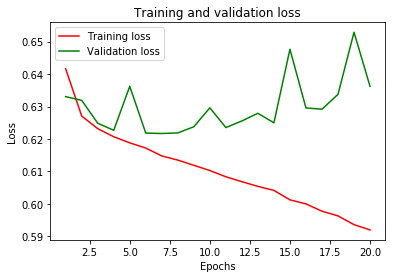

In [104]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

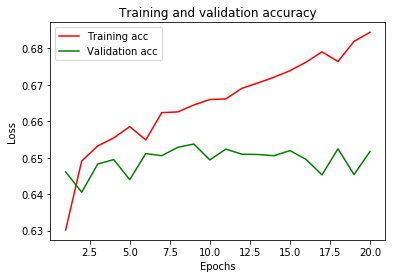

In [105]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [106]:
score=model.evaluate(X_test,y_test)
for i in range(len(score)):
     print("\n%s: %.2f%%" % (model.metrics_names[i], score[i]*100))

12171/12171 [==============================] - 0s 11us/step

loss: 63.62%

accuracy: 65.17%


In [99]:
from sklearn.metrics import roc_curve
y_pred = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)

In [100]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

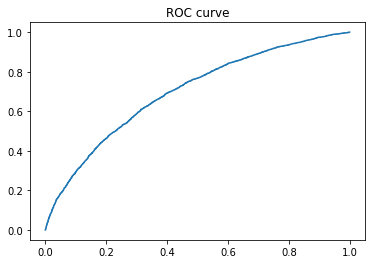

In [101]:
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.title('ROC curve')
plt.show()